Threshold Calculation

Some Useful Definitions:  
Maggie: Linear flux units. An object of AB magnitude of 0 has a flux of 1.0 maggie.  
Nanomaggie: Linear flux units. An object with an AB magnitude of 22.5 has a flux of 1e-9 maggie or 1.0 nanomaggie

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits as fits
from astropy.wcs import WCS
import sep

https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr10/south/coadd/000/0001m002/legacysurvey-0001m002-image-g.fits.fz
Filename: /Users/vernica/.astropy/cache/download/url/7736deeead2f3b8f68d00b73d4a8bb97/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU    142   (3600, 3600)   float32   
None
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 3600 / length of original image axis                  
NAXIS2  =                 3600 / length of original image axis                  
ZDITHER0=                 6049 / dithering offset when quantizing floats        
COMMENT Data product of the DESI Imaging Legacy Surveys                         
COMMENT Full documentati

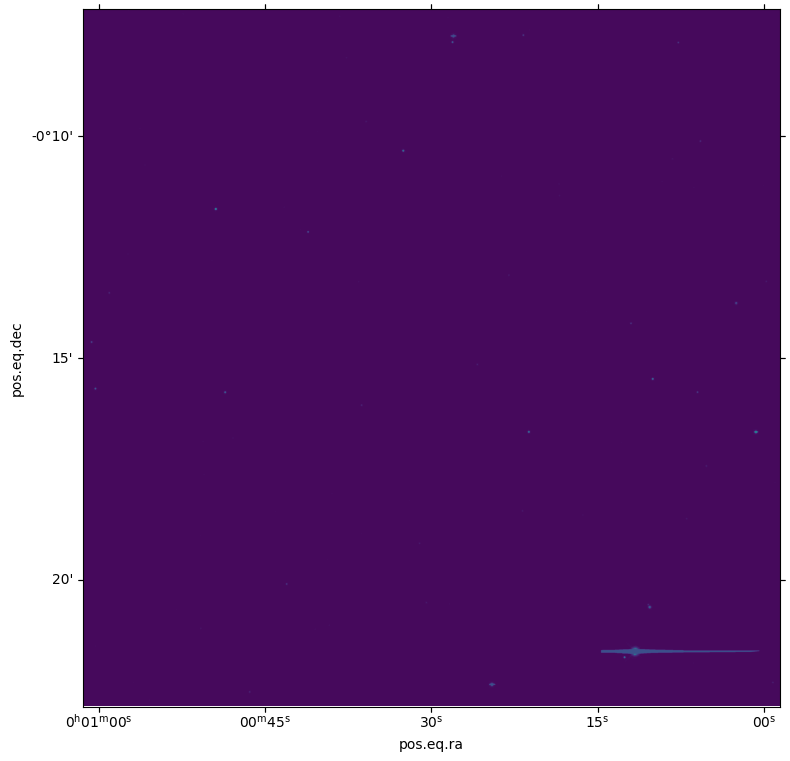

In [2]:
# test_image = fits.open("/mnt/c/Users/creat/Downloads/cutout_190.1086_1.2005.fits")

url = "https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr10/south/coadd/"
section = "000"
brick = "0001m002"
filters = "g"
image_string = url + f"{section}/{brick}/legacysurvey-{brick}-image-{filters}.fits.fz"
print(image_string)

test_image = fits.open(image_string)
print(test_image.info())
print(repr(test_image[1].header))

wcs = WCS(test_image[1].header)

zimage = test_image[1].data

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection=wcs)
lon = ax.coords['ra']
lat = ax.coords['dec']
ax.imshow(zimage, norm='linear')


plt.tight_layout()

Background Noise for Source Extraction

In [3]:
bkg=sep.Background(zimage)
#Single Number Average
sigm_gb=bkg.globalrms
print(sigm_gb)
bkg_rms=bkg.rms()
#As a 2-d Numpy Array
print(bkg_rms)

0.0017128840554505587
[[0.00162032 0.00161948 0.00161863 ... 0.00163253 0.00163355 0.00163457]
 [0.00161929 0.00161848 0.00161766 ... 0.00163351 0.0016345  0.00163549]
 [0.00161822 0.00161743 0.00161664 ... 0.00163449 0.00163545 0.00163642]
 ...
 [0.00173416 0.00173462 0.00173507 ... 0.00078353 0.0007831  0.00078267]
 [0.00173889 0.00173932 0.00173975 ... 0.0007823  0.00078185 0.00078139]
 [0.00174364 0.00174405 0.00174446 ... 0.00078106 0.00078058 0.00078011]]


Threshold

In [4]:
limiting_mag=21
mag_zero=test_image[1].header['MAGZERO']
flux=10**((limiting_mag-mag_zero)/(-2.5)) #This does not take into account PSF
a=flux/(1.5*sigm_gb)
print("Threshold is",a)

Threshold is 1549.461445008231


Threshold Function

In [5]:
def threshold_func(limit_mag,zero_mag,sigma_gb):
    threshold=(1/(1.5*sigma_gb))*(10**((zero_mag-limit_mag)/2.5))
    return threshold

Test the Function Works using This Image

In [6]:
threshold_func(limiting_mag,mag_zero,sigm_gb)

1549.461445008231